# Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans
Sábado, Nov 12 2022

---

##### Objetivo: Implementar conocimientos adquiridos a lo largo de curso en el desarrollo de un proyecto con datos reales.

- Alumno: César Iván Pedrero Martínez
- Matrícula: A01366501
- Profesor: Julio César Galindo López

## Parte 1: Limpieza de la base de datos

In [724]:
import numpy as np
import os.path
import pandas as pd
import matplotlib.pyplot as plt

In [725]:
DATASET_PATH = "../data/"
DATASET_NAME = "Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"

In [726]:
def warn(msg):
    """
    Simple replacement to the warning method
    from the common library. Prints a given message
    with a warning prefix.
    """
    warnPrefix = "[WARNING]"
    print(warnPrefix, msg)

def log(msg, start=" ", end="\n"):
    """
    Simple replacement to the print method
    from the common library. Prints a given message
    with a log prefix.
    """
    logPrefix = "[INFO]" + start
    print(logPrefix + str(msg), end=end)

In [727]:
def showRowsWithNan(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Gets the rows from a column with NaN values.
    """
    log("Showing current rows containing NaN for the {} column:".format(col))
    return df[df[col].isna()]

def showRowsWithNanMultiColumn(df: pd.DataFrame, colArray: list) -> pd.DataFrame:
    """
    Gets the rows from a column with NaN values.
    """
    log("Showing current rows containing NaN for the {} columns:".format(colArray))
    nanDF = df[df[colArray].isna().any(axis=1)]
    return nanDF[colArray]

def showColumnswithNaN(df: pd.DataFrame) -> pd.DataFrame:
    """
    Shows all the columns in the data frame along with a
    boolean value that indicates if the column has NaN values
    or not.
    """
    log("Showing current column NaN state:")
    return df.isna().any()

def showUniques(df: pd.DataFrame, col: str) -> list:
    """
    Returns the unique values of a given column
    in the data frame.
    """
    log("Showing unique values for the {} column:".format(col))
    return df[col].unique()

def showAllDataframeTypes(df) -> pd.DataFrame:
    """
    Shows each column of the data frame
    along with its current data type.
    """
    return df.dtypes

In [728]:
def replaceNanWithMode(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Replaces the NaN values of a data frame column
    with the mode. Be careful when using this method
    as the mode could be NaN. If this is the case,
    the method will fallback to using the median instead.

    Returns the modified dataframe column.
    """
    log("Cleaning using mode. Number of NaN in the column {}: {}".format(col, df[col].isna().sum()))
    if np.isnan(df[col].mode().any()):
        warn("The mode of the column {} is NaN. Using the median instead.".format(col))
        return replaceNanWithMedian(df, col)
    return df[col].fillna(df[col].mode()[0])

def replaceNanWithMedian(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Replaces the NaN values of a data frame column
    with the median.
    
    Returns the modified dataframe column.
    """
    log("Cleaning using median. Number of NaN in the column {}: {}".format(col, df[col].isna().sum()))
    return df[col].fillna(df[col].median())

def replaceNanWithMean(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Replaces the NaN values of a data frame column
    with the algebraic mean.
    
    Returns the modified dataframe column.
    """
    log("Cleaning using mean. Number of NaN in the column {}: {}".format(col, df[col].isna().sum()))
    return df[col].fillna(df[col].mean())

def replaceNanWithCustomValue(df: pd.DataFrame, col: str, customValue: any) -> pd.DataFrame:
    """
    Replaces the NaN values of a data frame column
    with the algebraic mean.
    
    Returns the modified dataframe column.
    """
    log("Cleaning using a custom value. Number of NaN in the column {}: {}".format(col, df[col].isna().sum()))
    return df[col].fillna(customValue)

def replaceSpecificValue(df: pd.DataFrame, col: str, oldValue: str, newValue: any) -> pd.DataFrame:
    """
    Replaces the NaN values of a data frame column
    with the algebraic mean.
    
    Returns the modified dataframe column.
    """
    log("Number of '{}' in {} being replaced for '{}': {}".format(oldValue, col, newValue, len(df[df[col] == oldValue])))
    return df[col].replace(oldValue, newValue)

def changeColumnType(df: pd.DataFrame, col: str, newType: str) -> pd.DataFrame:
    """
    Changes the type of a given column
    to a given type. Be careful with the type
    parameter, as this is a string representing
    the new type.
    """
    log("Updating column {} to {}".format(col, newType))
    return df[col].astype(newType)

In [729]:
df = pd.read_csv(os.path.join(DATASET_PATH, DATASET_NAME), encoding='latin1')
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [730]:
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [731]:
# Replace the < values for a very small value not in the column. The idea here is to replace the < with the same smallest.
# This to prevent the replacement of a number that may actually be the smallest in the dataframe. Some big int values
# are going to be left like that because that's the smallest value in the data (1.1, 20).
df["COLI_FEC_NMP/100_mL"] = replaceSpecificValue(df, "COLI_FEC_NMP/100_mL", "<1.1", "1.1")
df["AS_TOT_mg/L"] = replaceSpecificValue(df, "AS_TOT_mg/L", "<0.01", "0.001")
df["CD_TOT_mg/L"] = replaceSpecificValue(df, "CD_TOT_mg/L", "<0.003", "0.0003")
df["CR_TOT_mg/L"] = replaceSpecificValue(df, "CR_TOT_mg/L", "<0.005", "0.0005")
df["HG_TOT_mg/L"] = replaceSpecificValue(df, "HG_TOT_mg/L", "<0.0005", "0.00005")
df["PB_TOT_mg/L"] = replaceSpecificValue(df, "PB_TOT_mg/L", "<0.005", "0.0005")
df["MN_TOT_mg/L"] = replaceSpecificValue(df, "MN_TOT_mg/L", "<0.0015", "0.00015")
df["FE_TOT_mg/L"] = replaceSpecificValue(df, "FE_TOT_mg/L", "<0.025", "0.0025")
df["FLUORUROS_mg/L"] = replaceSpecificValue(df, "FLUORUROS_mg/L", "<0.2", "0.002")
df["DUR_mg/L"] = replaceSpecificValue(df, "DUR_mg/L", "<20", "20")
df["N_NO3_mg/L"] = replaceSpecificValue(df, "N_NO3_mg/L", "<0.02", "0.002")
df["SDT_M_mg/L"] = replaceSpecificValue(df, "SDT_M_mg/L", "<25", "25")

[INFO] Number of '<1.1' in COLI_FEC_NMP/100_mL being replaced for '1.1': 737
[INFO] Number of '<0.01' in AS_TOT_mg/L being replaced for '0.001': 815
[INFO] Number of '<0.003' in CD_TOT_mg/L being replaced for '0.0003': 1066
[INFO] Number of '<0.005' in CR_TOT_mg/L being replaced for '0.0005': 854
[INFO] Number of '<0.0005' in HG_TOT_mg/L being replaced for '0.00005': 968
[INFO] Number of '<0.005' in PB_TOT_mg/L being replaced for '0.0005': 1038
[INFO] Number of '<0.0015' in MN_TOT_mg/L being replaced for '0.00015': 545
[INFO] Number of '<0.025' in FE_TOT_mg/L being replaced for '0.0025': 401
[INFO] Number of '<0.2' in FLUORUROS_mg/L being replaced for '0.002': 162
[INFO] Number of '<20' in DUR_mg/L being replaced for '20': 26
[INFO] Number of '<0.02' in N_NO3_mg/L being replaced for '0.002': 65
[INFO] Number of '<25' in SDT_M_mg/L being replaced for '25': 1


In [732]:
# Now lets change the type of all the columns meant to be floats.

def changeValuesToFloat(cols):
    for col in cols:
        df[col] = changeColumnType(df, col, "float64")

cols = ["COLI_FEC_NMP/100_mL", "AS_TOT_mg/L", "CD_TOT_mg/L", "CR_TOT_mg/L",
        "HG_TOT_mg/L", "PB_TOT_mg/L", "MN_TOT_mg/L", "FE_TOT_mg/L", 
        "FLUORUROS_mg/L", "DUR_mg/L", "N_NO3_mg/L", "SDT_M_mg/L"]

changeValuesToFloat(cols)

[INFO] Updating column COLI_FEC_NMP/100_mL to float64
[INFO] Updating column AS_TOT_mg/L to float64
[INFO] Updating column CD_TOT_mg/L to float64
[INFO] Updating column CR_TOT_mg/L to float64
[INFO] Updating column HG_TOT_mg/L to float64
[INFO] Updating column PB_TOT_mg/L to float64
[INFO] Updating column MN_TOT_mg/L to float64
[INFO] Updating column FE_TOT_mg/L to float64
[INFO] Updating column FLUORUROS_mg/L to float64
[INFO] Updating column DUR_mg/L to float64
[INFO] Updating column N_NO3_mg/L to float64
[INFO] Updating column SDT_M_mg/L to float64


In [733]:
# Now lets change the boolean values. We will replace the 'ND' (NO DATA) with the mode of the column.

cols = ["CUMPLE_CON_ALC", "CUMPLE_CON_COND", "CUMPLE_CON_SDT_ra",
        "CUMPLE_CON_SDT_salin", "CUMPLE_CON_FLUO", "CUMPLE_CON_DUR",
        "CUMPLE_CON_CF", "CUMPLE_CON_NO3", "CUMPLE_CON_AS", "CUMPLE_CON_CD",
        "CUMPLE_CON_CR", "CUMPLE_CON_HG", "CUMPLE_CON_PB", "CUMPLE_CON_MN",
        "CUMPLE_CON_FE"]

for col in cols:
    df[col] = replaceSpecificValue(df, col, "ND", df[col].mode()[0])
    df[col] = replaceSpecificValue(df, col, "SI", 1)
    df[col] = replaceSpecificValue(df, col, "NO", 0)
    df[col] = changeColumnType(df, col, "int64")

[INFO] Number of 'ND' in CUMPLE_CON_ALC being replaced for 'SI': 4
[INFO] Number of 'SI' in CUMPLE_CON_ALC being replaced for '1': 1009
[INFO] Number of 'NO' in CUMPLE_CON_ALC being replaced for '0': 59
[INFO] Updating column CUMPLE_CON_ALC to int64
[INFO] Number of 'ND' in CUMPLE_CON_COND being replaced for 'SI': 6
[INFO] Number of 'SI' in CUMPLE_CON_COND being replaced for '1': 945
[INFO] Number of 'NO' in CUMPLE_CON_COND being replaced for '0': 123
[INFO] Updating column CUMPLE_CON_COND to int64
[INFO] Number of 'ND' in CUMPLE_CON_SDT_ra being replaced for 'SI': 2
[INFO] Number of 'SI' in CUMPLE_CON_SDT_ra being replaced for '1': 997
[INFO] Number of 'NO' in CUMPLE_CON_SDT_ra being replaced for '0': 71
[INFO] Updating column CUMPLE_CON_SDT_ra to int64
[INFO] Number of 'ND' in CUMPLE_CON_SDT_salin being replaced for 'SI': 2
[INFO] Number of 'SI' in CUMPLE_CON_SDT_salin being replaced for '1': 997
[INFO] Number of 'NO' in CUMPLE_CON_SDT_salin being replaced for '0': 71
[INFO] Updating

In [734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [735]:
df.isna()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1066,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [736]:
# Drop empty columns.
df.dropna(how='all', axis=1, inplace=True)

In [737]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

In [738]:
showColumnswithNaN(df)

[INFO] Showing current column NaN state:


CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

In [739]:
# Cleanse the columns that have null values.
df["ALC_mg/L"] = replaceNanWithMean(df, "ALC_mg/L")
df["CONDUCT_mS/cm"] = replaceNanWithMean(df, "CONDUCT_mS/cm")
df["SDT_M_mg/L"] = replaceNanWithMean(df, "SDT_M_mg/L")
df["DUR_mg/L"] = replaceNanWithMean(df, "DUR_mg/L")
df["N_NO3_mg/L"] = replaceNanWithMean(df, "N_NO3_mg/L")

df["CALIDAD_ALC"] = replaceNanWithMode(df, "CALIDAD_ALC")
df["CALIDAD_CONDUC"] = replaceNanWithMode(df, "CALIDAD_CONDUC")
df["CALIDAD_SDT_ra"] = replaceNanWithMode(df, "CALIDAD_SDT_ra")
df["CALIDAD_SDT_salin"] = replaceNanWithMode(df, "CALIDAD_SDT_salin")
df["CALIDAD_DUR"] = replaceNanWithMode(df, "CALIDAD_DUR")
df["CALIDAD_N_NO3"] = replaceNanWithMode(df, "CALIDAD_N_NO3")

df["CONTAMINANTES"] = replaceNanWithCustomValue(df, "CONTAMINANTES", "N/A")

[INFO] Cleaning using mean. Number of NaN in the column ALC_mg/L: 4
[INFO] Cleaning using mean. Number of NaN in the column CONDUCT_mS/cm: 6
[INFO] Cleaning using mean. Number of NaN in the column SDT_M_mg/L: 2
[INFO] Cleaning using mean. Number of NaN in the column DUR_mg/L: 1
[INFO] Cleaning using mean. Number of NaN in the column N_NO3_mg/L: 1
[INFO] Cleaning using mode. Number of NaN in the column CALIDAD_ALC: 4
[INFO] Cleaning using mode. Number of NaN in the column CALIDAD_CONDUC: 6
[INFO] Cleaning using mode. Number of NaN in the column CALIDAD_SDT_ra: 2
[INFO] Cleaning using mode. Number of NaN in the column CALIDAD_SDT_salin: 2
[INFO] Cleaning using mode. Number of NaN in the column CALIDAD_DUR: 1
[INFO] Cleaning using mode. Number of NaN in the column CALIDAD_N_NO3: 1
[INFO] Cleaning using a custom value. Number of NaN in the column CONTAMINANTES: 434


In [740]:
# Re-check empty values.
showColumnswithNaN(df)

[INFO] Showing current column NaN state:


CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

In [741]:
# TODO: Get the dummies of this values:
df.select_dtypes(exclude=["int64","bool_", "float64"])

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,...,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SEMAFORO,CONTAMINANTES
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,Alta,Permisible para riego,Cultivos sensibles,...,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,N/A
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,Alta,Buena para riego,Excelente para riego,...,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,N/A
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,Alta,Buena para riego,Excelente para riego,...,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"FLUO,AS,"
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,Alta,Buena para riego,Excelente para riego,...,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,N/A
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,Alta,Permisible para riego,Cultivos con manejo especial,...,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"NO3,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,Alta,Dudosa para riego,Cultivos con manejo especial,...,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"CONDUC,DT,NO3,"
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,Alta,Buena para riego,Excelente para riego,...,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"NO3,"
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,Alta,Dudosa para riego,Cultivos con manejo especial,...,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"CONDUC,DT,NO3,"
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,Alta,Permisible para riego,Cultivos sensibles,...,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,N/A


## Parte 2: Exploración de los datos

In [742]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,...,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,896.101567,1.045566,347.938073,355.490356,4.318662,...,0.788390,0.942884,0.923221,0.881086,0.998127,0.985955,0.999064,0.988764,0.919476,0.872659
std,6.703263,3.887670,0.0,116.655014,1242.056683,2748.950627,1.939212,359.500870,2052.457014,8.341789,...,0.408641,0.232173,0.266365,0.323839,0.043254,0.117731,0.030600,0.105452,0.272231,0.333511
min,-116.664250,14.561150,2020.0,26.640000,50.400000,25.000000,0.002000,20.000000,1.100000,0.002000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,-102.174180,22.617190,2020.0,215.825000,822.500000,551.400000,0.503500,245.662350,1.100000,2.082916,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [743]:
df.var()

/var/folders/3z/3340wyws0q3fr4z6_yx4yc7r0000gn/T/ipykernel_37589/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


LONGITUD                4.493373e+01
LATITUD                 1.511398e+01
PERIODO                 0.000000e+00
ALC_mg/L                1.360839e+04
CONDUCT_mS/cm           1.542705e+06
SDT_M_mg/L              7.556730e+06
FLUORUROS_mg/L          3.760541e+00
DUR_mg/L                1.292409e+05
COLI_FEC_NMP/100_mL     4.212580e+06
N_NO3_mg/L              6.958544e+01
AS_TOT_mg/L             1.386591e-03
CD_TOT_mg/L             9.734551e-07
CR_TOT_mg/L             2.389952e-02
HG_TOT_mg/L             2.822587e-07
PB_TOT_mg/L             1.360958e-05
MN_TOT_mg/L             1.418600e-01
FE_TOT_mg/L             3.067579e+01
CUMPLE_CON_ALC          5.224052e-02
CUMPLE_CON_COND         1.020003e-01
CUMPLE_CON_SDT_ra       6.211805e-02
CUMPLE_CON_SDT_salin    6.211805e-02
CUMPLE_CON_FLUO         1.475943e-01
CUMPLE_CON_DUR          1.669878e-01
CUMPLE_CON_CF           5.390433e-02
CUMPLE_CON_NO3          7.095044e-02
CUMPLE_CON_AS           1.048715e-01
CUMPLE_CON_CD           1.870904e-03
C

In [744]:
modeDf = df.mode().loc[:0].drop(["CLAVE", "LONGITUD", "LATITUD"], axis=1)

log("Printing mode of all columns:", end="\n"*2)
for col in modeDf.columns:
    log("{}: {}".format(modeDf[col].name, modeDf[col].values))

[INFO] Printing mode of all columns:

[INFO] SITIO: ['EL FUERTE']
[INFO] ORGANISMO_DE_CUENCA: ['CUENCAS CENTRALES DEL NORTE']
[INFO] ESTADO: ['DURANGO']
[INFO] MUNICIPIO: ['LA PAZ']
[INFO] ACUIFERO: ['PENINSULA DE YUCATAN']
[INFO] SUBTIPO: ['POZO']
[INFO] PERIODO: [2020.]
[INFO] ALC_mg/L: [157.62]
[INFO] CALIDAD_ALC: ['Alta']
[INFO] CONDUCT_mS/cm: [777.]
[INFO] CALIDAD_CONDUC: ['Permisible para riego']
[INFO] SDT_M_mg/L: [292.]
[INFO] CALIDAD_SDT_ra: ['Excelente para riego']
[INFO] CALIDAD_SDT_salin: ['Potable - Dulce']
[INFO] FLUORUROS_mg/L: [0.002]
[INFO] CALIDAD_FLUO: ['Baja']
[INFO] DUR_mg/L: [20.]
[INFO] CALIDAD_DUR: ['Potable - Dura']
[INFO] COLI_FEC_NMP/100_mL: [1.1]
[INFO] CALIDAD_COLI_FEC: ['Potable - Excelente']
[INFO] N_NO3_mg/L: [0.002]
[INFO] CALIDAD_N_NO3: ['Potable - Excelente']
[INFO] AS_TOT_mg/L: [0.001]
[INFO] CALIDAD_AS: ['Potable - Excelente']
[INFO] CD_TOT_mg/L: [0.0003]
[INFO] CALIDAD_CD: ['Potable - Excelente']
[INFO] CR_TOT_mg/L: [0.0005]
[INFO] CALIDAD_CR: ['Po

In [745]:
# Lets identify correlations.
df.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
LONGITUD,1.000000,-0.760204,NaN,0.166915,0.060803,-0.013926,-0.133217,0.088164,-0.084443,-0.107550,...,-0.159677,0.107847,0.113675,0.135760,-0.034033,-0.079644,-0.021223,-0.012521,0.084977,-0.010544
LATITUD,-0.760204,1.000000,NaN,-0.079797,0.053506,0.059834,0.140488,0.085163,0.063130,0.148267,...,-0.048965,-0.021252,-0.120808,-0.153838,0.035924,0.121189,0.037977,0.069544,0.032386,0.046176
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.166915,-0.079797,NaN,1.000000,0.219654,0.079285,0.068852,0.242957,-0.016448,-0.000437,...,-0.260131,-0.009116,-0.028578,-0.036902,-0.009830,0.012871,-0.031603,-0.039506,-0.170677,-0.062126
CONDUCT_mS/cm,0.060803,0.053506,NaN,0.219654,1.000000,0.286406,-0.023766,0.692270,0.017807,0.219304,...,-0.514644,-0.011593,-0.187521,0.008659,-0.008742,-0.004401,-0.067863,-0.057906,-0.069763,-0.116753
SDT_M_mg/L,-0.013926,0.059834,NaN,0.079285,0.286406,1.000000,-0.012572,0.347115,-0.001133,0.101594,...,-0.254651,0.004391,-0.071404,0.011832,-0.003265,0.001929,-0.015686,-0.005510,-0.007210,-0.040282
FLUORUROS_mg/L,-0.133217,0.140488,NaN,0.068852,-0.023766,-0.012572,1.000000,-0.149211,0.002740,-0.018409,...,0.103126,0.038585,-0.022988,-0.362150,0.023320,0.016322,0.006216,0.033417,0.088241,-0.008678
DUR_mg/L,0.088164,0.085163,NaN,0.242957,0.692270,0.347115,-0.149211,1.000000,0.031727,0.301395,...,-0.745484,-0.045414,-0.214951,0.114227,-0.009957,-0.004400,-0.046011,-0.008434,-0.065707,-0.101833
COLI_FEC_NMP/100_mL,-0.084443,0.063130,NaN,-0.016448,0.017807,-0.001133,0.002740,0.031727,1.000000,-0.000985,...,-0.014093,-0.634911,0.018399,-0.006715,-0.024979,0.020587,0.005288,-0.012470,-0.004583,-0.100028
N_NO3_mg/L,-0.107550,0.148267,NaN,-0.000437,0.219304,0.101594,-0.018409,0.301395,-0.000985,1.000000,...,-0.233543,-0.000825,-0.685494,0.000236,0.015077,0.027920,-0.015631,0.011102,0.094168,0.052020


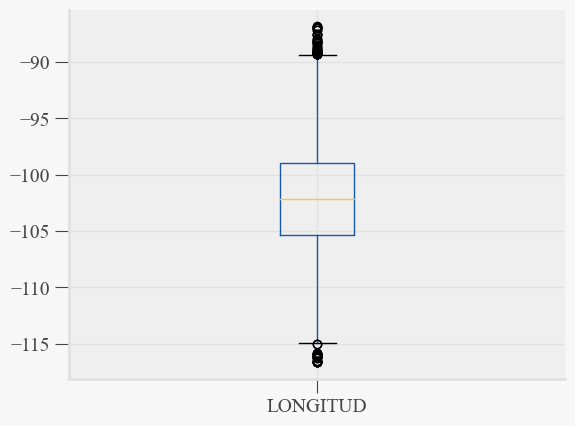

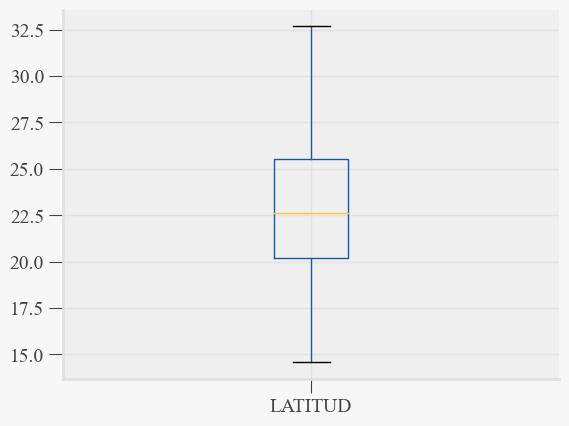

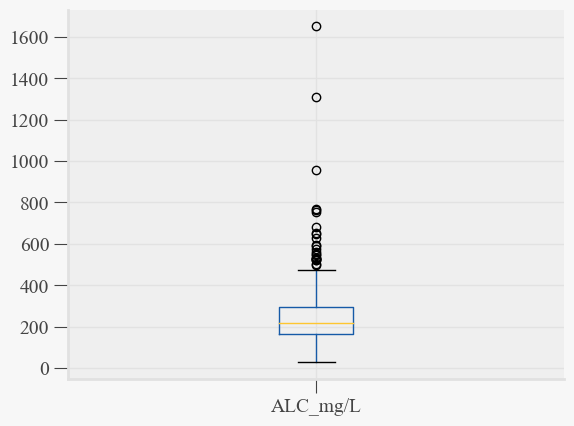

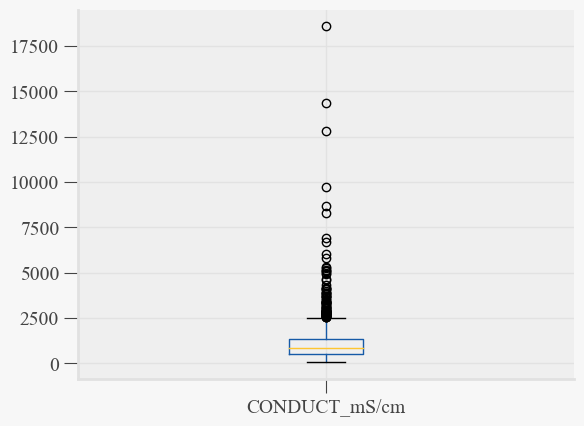

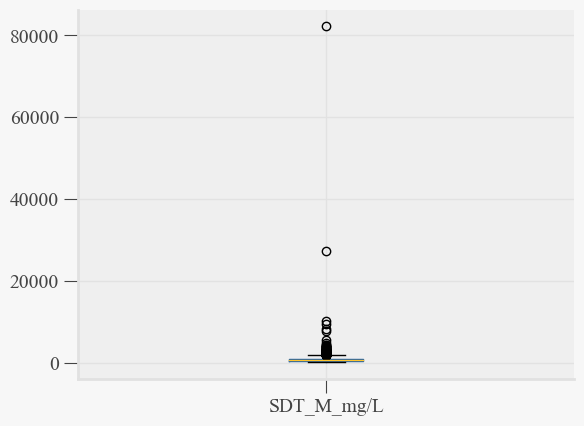

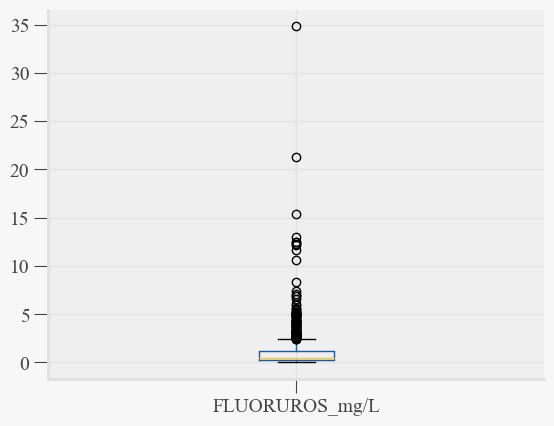

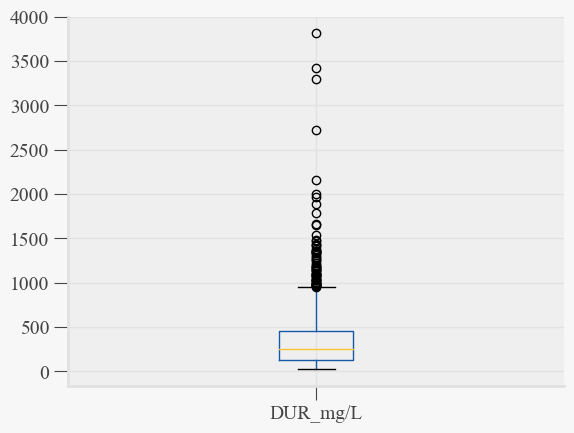

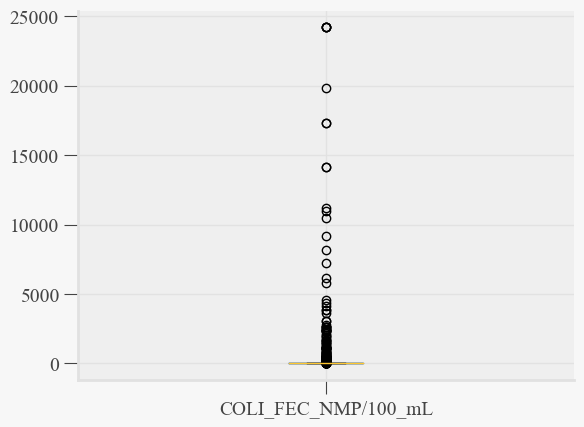

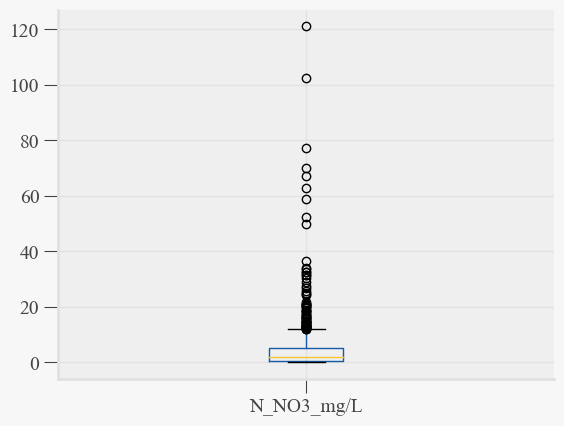

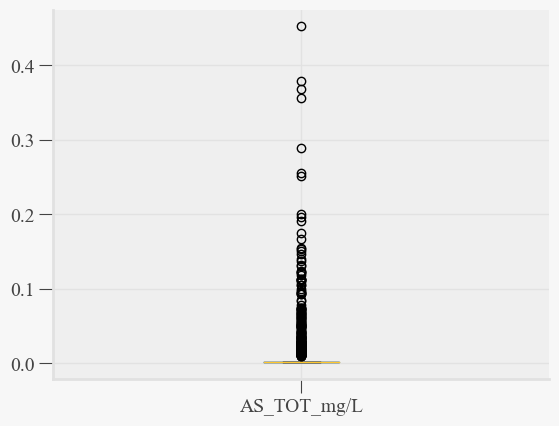

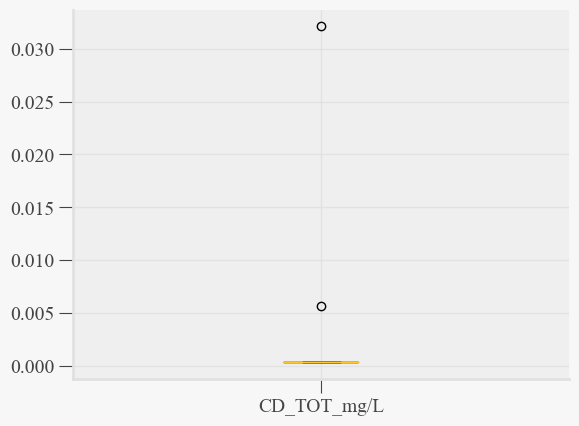

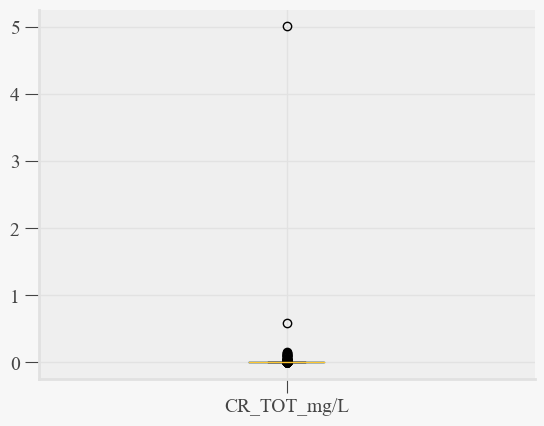

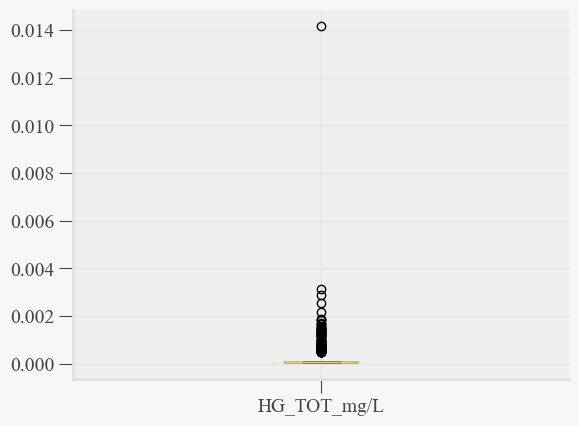

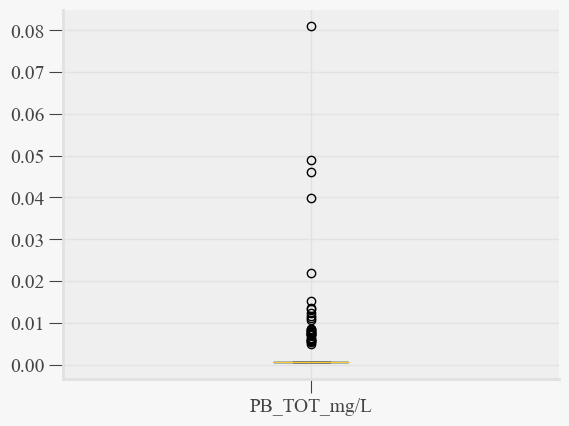

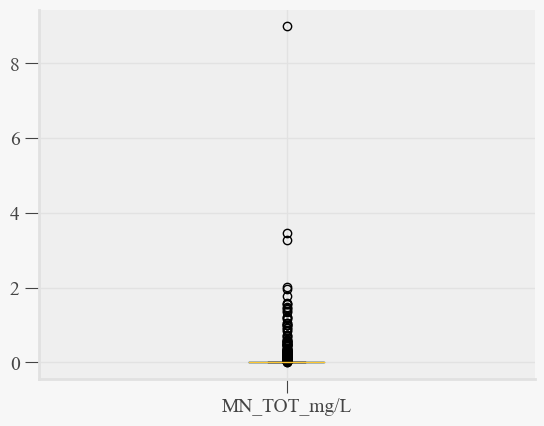

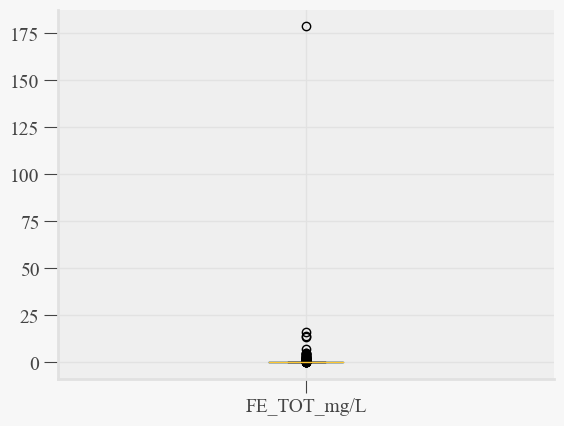

In [746]:
# Let's create a box plot for each of the float columns.

def plotBoxForFloatColumns():
    for col in df.columns:
        if df[col].dtype != "float64":
            continue
        
        name = list(col.lower())
        name[0] = name[0].upper()
        name = "".join(name)

        df.boxplot(column = col).plot()
        plt.show()
  
plotBoxForFloatColumns()

## Parte 3: Análisis K-Means

In [747]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']

In [748]:
mapDf = df[["SITIO", "LATITUD", "LONGITUD", "SEMAFORO"]]

mapDf = mapDf.rename({"SITIO":"name", "LATITUD": "latitude", "LONGITUD": "longitude", "SEMAFORO": "semaphore"}, axis=1)
mapDf

,name,latitude,longitude,semaphore
0,POZO SAN GIL,22.20887,-102.02210,Verde
1,POZO R013 CAÑADA HONDA,21.99958,-102.20075,Verde
2,POZO COSIO,22.36685,-102.28801,Rojo
3,POZO EL SALITRILLO,22.18435,-102.29449,Verde
4,RANCHO EL TECOLOTE,23.45138,-110.24480,Rojo
...,...,...,...,...
1063,L-310 (COMUNIDAD SAN MANUEL),24.76036,-99.54191,Rojo
1064,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),24.78280,-99.70099,Rojo
1065,HACIENDA MEXIQUITO POZO 01,25.55197,-99.82249,Rojo
1066,COMUNIDAD LOS POCITOS,24.80118,-100.32683,Verde


In [749]:
mapDf["Coordinates"] = list(zip(mapDf.longitude, mapDf.latitude))
mapDf["Coordinates"] = mapDf["Coordinates"].apply(Point)
mapDf.head()

,name,latitude,longitude,semaphore,Coordinates
0,POZO SAN GIL,22.20887,-102.02210,Verde,POINT (-102.0221 22.20887)
1,POZO R013 CAÑADA HONDA,21.99958,-102.20075,Verde,POINT (-102.20075 21.99958)
2,POZO COSIO,22.36685,-102.28801,Rojo,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,22.18435,-102.29449,Verde,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,23.45138,-110.24480,Rojo,POINT (-110.2448 23.45138)


In [750]:
gdf = gpd.GeoDataFrame(mapDf, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,semaphore,Coordinates
0,POZO SAN GIL,22.20887,-102.02210,Verde,POINT (-102.02210 22.20887)
1,POZO R013 CAÑADA HONDA,21.99958,-102.20075,Verde,POINT (-102.20075 21.99958)
2,POZO COSIO,22.36685,-102.28801,Rojo,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,22.18435,-102.29449,Verde,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,23.45138,-110.24480,Rojo,POINT (-110.24480 23.45138)


In [751]:
mex = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
mex = mex.set_index("iso_a3")

In [752]:
gdf["semaphore"] = replaceSpecificValue(gdf, "semaphore", "Verde", "green")
gdf["semaphore"] = replaceSpecificValue(gdf, "semaphore", "Rojo", "red")
gdf["semaphore"] = replaceSpecificValue(gdf, "semaphore", "Amarillo", "yellow")

[INFO] Number of 'Verde' in semaphore being replaced for 'green': 434
[INFO] Number of 'Rojo' in semaphore being replaced for 'red': 387
[INFO] Number of 'Amarillo' in semaphore being replaced for 'yellow': 247


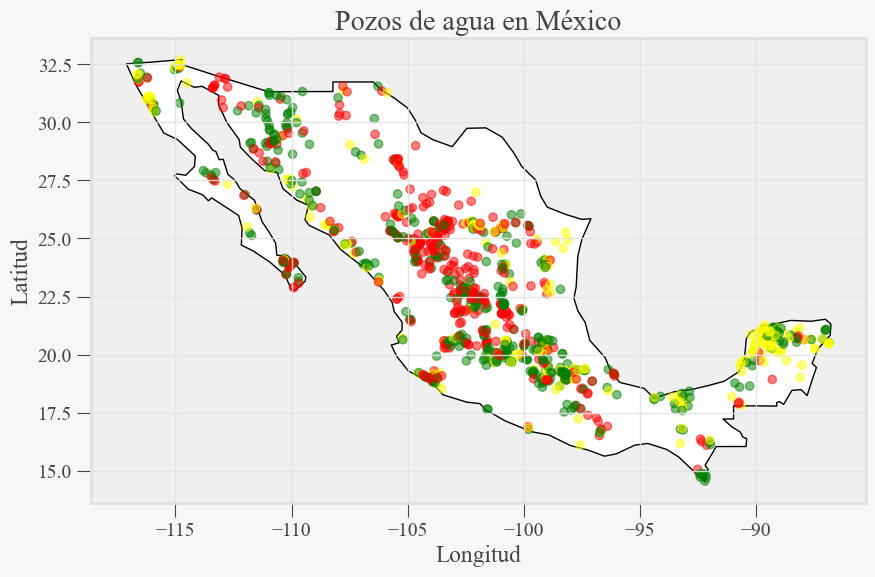

In [753]:
fig, gax = plt.subplots(figsize=(10,10))

mex.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color=gdf["semaphore"], alpha = 0.5)

gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Pozos de agua en México')

gax.spines['top'].set_visible(True)
gax.spines['right'].set_visible(True)

plt.show()

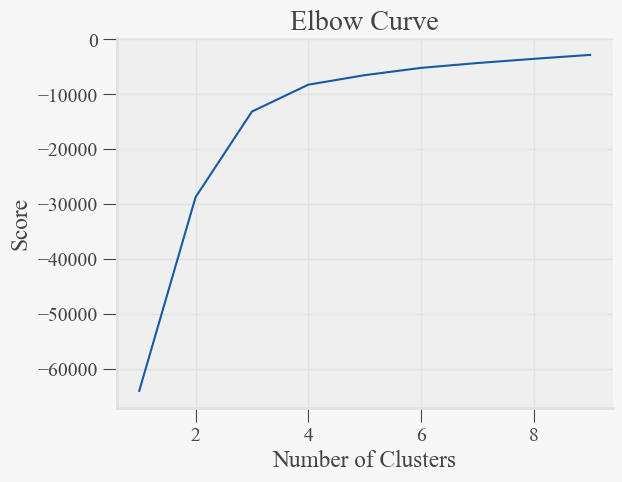

In [754]:
# Lets start the kmeans.

from sklearn.cluster import KMeans

# First lets find the number of warehouses using the elbow method:

latlong = pd.DataFrame(mapDf[["latitude", "longitude"]])

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [755]:
# Let's go with 4.

k = 4

kmeans = KMeans(n_clusters=k).fit(latlong)
centroids = kmeans.cluster_centers_

print("Centroids:")
print(centroids)

Centroids:
[[  20.26513862 -100.23589728]
 [  28.7340166  -111.44537124]
 [  19.6502625   -90.09271578]
 [  24.78413218 -103.66798788]]


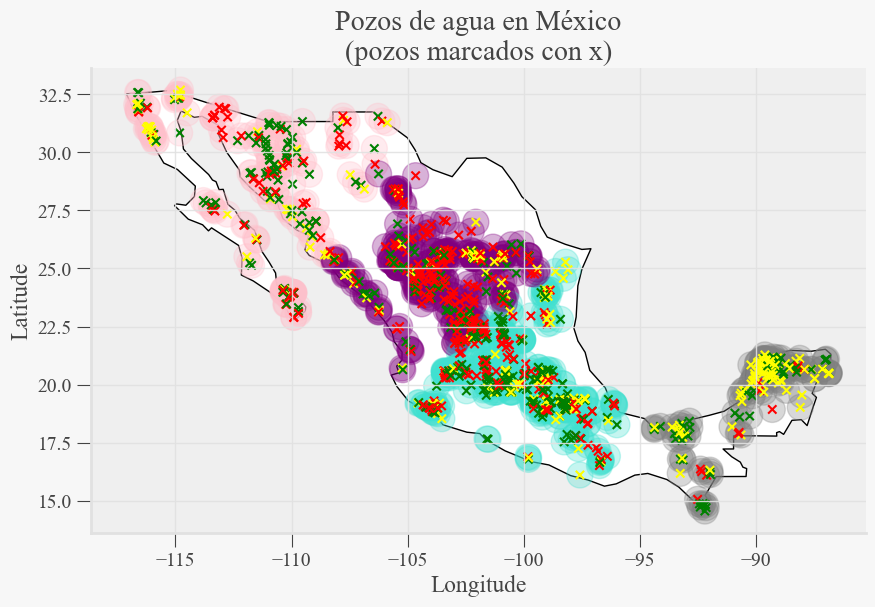

In [758]:
# Plot again the same map but using the kmeans clusters (indicated by color).
fig, gax = plt.subplots(figsize=(10,10))
mex.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Pozos de agua en México\n(pozos marcados con x)')


gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

colorMap = {0: "turquoise", 1: "pink", 2: "grey", 3: "purple"}
colors = [colorMap[i] for i in kmeans.labels_.astype(float)]
plt.scatter(latlong['longitude'], latlong['latitude'], c=colors, alpha=0.3, s=350)

gdf.plot(ax=gax, color=gdf["semaphore"], alpha = 1, marker="x")

plt.show()


**Parece ser que existe una correlación entre la calidad del agua y su ubicación geográfica.**

- Se puede apreciar que en el **sureste de México prevalecen más las aguas con semáforo amarillo**.
- El **centro superior de la república la gran mayoría de los pozos tienen un semáforo rojo**.
- El **centro inferior de la república y la península de Baja California (y una parte del norte) tienen una combinación de semáforos verdes con amarillo (con un procentaje más bajo de semáforos rojos)**.